# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

617

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Loop through the list of cities and perform a request for data on each
print(f'Checking Weather Data:')
for city in cities:
    response = requests.get(query_url + city).json()

    try:
        print(f"City Name: {response['name']}, City Number: {response['id']}, the temp is: {response['main']['temp']}C.")
    except (KeyError, IndexError):
        print("City not found")


Checking Weather Data:
City Name: Punta Arenas, City Number: 3874787, the temp is: 8.06C.
City Name: Tiksi, City Number: 2015306, the temp is: 8.17C.
City Name: Busselton, City Number: 2075265, the temp is: 17.8C.
City Name: Coruripe, City Number: 3465329, the temp is: 22.1C.
City Name: Kruisfontein, City Number: 986717, the temp is: 9.21C.
City Name: Ostrovnoy, City Number: 556268, the temp is: 8.38C.
City Name: Watertown, City Number: 4954611, the temp is: 16.32C.
City Name: Province of Trapani, City Number: 2522875, the temp is: 24.01C.
City Name: Dawei, City Number: 1293625, the temp is: 26.42C.
City Name: Hong Kong, City Number: 1819729, the temp is: 32.1C.
City not found
City Name: Port Elizabeth, City Number: 964420, the temp is: 10.16C.
City Name: Qaanaaq, City Number: 3831208, the temp is: 6.11C.
City Name: Jamestown, City Number: 5122534, the temp is: 18.21C.
City Name: Saint-Philippe, City Number: 935215, the temp is: 19.93C.
City Name: Tasiilaq, City Number: 3424607, the te

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# NOTE: Not sure if we are suppose to export our file, in this download we already had a cities.csv files 
# In this case I will be IMPORTING the file and displaying the frame down here.
csv_path = '../output_data/cities.csv'

cities_df = pd.read_csv(csv_path)

cities_df


,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,ostrovnoy,2,RU,1558378754,72,68.05,39.51,37.50,7.16
1,1,mahebourg,75,MU,1558378503,74,-20.41,57.70,78.80,11.41
2,2,qaanaaq,25,GL,1558378755,73,77.48,-69.36,22.20,2.37
3,3,zhuhai,0,CN,1558378755,39,40.71,112.04,44.60,4.47
4,4,cape town,20,ZA,1558378755,76,-33.93,18.42,55.99,8.05
...,...,...,...,...,...,...,...,...,...,...
543,543,yabrud,0,SY,1558378840,32,33.97,36.66,80.60,8.05
544,544,paraiso,5,MX,1558378898,4,24.01,-104.61,84.20,16.11
545,545,veraval,0,FR,1558378898,62,49.65,0.71,61.00,8.05
546,546,novyy urgal,100,RU,1558378899,93,51.07,132.56,49.74,2.68


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
#  Get the indices of cities that have humidity over 100%.
cities_over_100 = cities_df.loc[cities_df['Humidity'] > 100]

cities_over_100

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
129,129,paita,0,PE,1558378778,290,-5.09,-81.11,62.6,17.22


In [7]:
indexNames = cities_df[ (cities_df['Humidity'] > 100) ].index
print(indexNames)

Int64Index([129], dtype='int64')


In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = cities_df.drop(indexNames , inplace=False)

clean_city_data

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,ostrovnoy,2,RU,1558378754,72,68.05,39.51,37.50,7.16
1,1,mahebourg,75,MU,1558378503,74,-20.41,57.70,78.80,11.41
2,2,qaanaaq,25,GL,1558378755,73,77.48,-69.36,22.20,2.37
3,3,zhuhai,0,CN,1558378755,39,40.71,112.04,44.60,4.47
4,4,cape town,20,ZA,1558378755,76,-33.93,18.42,55.99,8.05
...,...,...,...,...,...,...,...,...,...,...
543,543,yabrud,0,SY,1558378840,32,33.97,36.66,80.60,8.05
544,544,paraiso,5,MX,1558378898,4,24.01,-104.61,84.20,16.11
545,545,veraval,0,FR,1558378898,62,49.65,0.71,61.00,8.05
546,546,novyy urgal,100,RU,1558378899,93,51.07,132.56,49.74,2.68


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

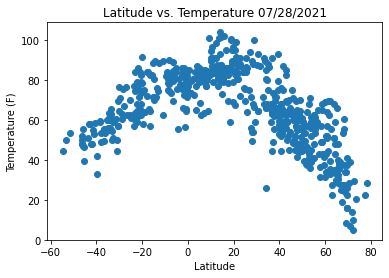

In [9]:
plt.scatter(clean_city_data['Lat'], clean_city_data['Max Temp'], marker='o')

# Incorporate the other graph properties
plt.title(f'Latitude vs. Temperature {time.strftime("%m/%d/%Y")}')
plt.ylabel('Temperature (F)')
plt.xlabel('Latitude')

# Save the figure
plt.savefig('../output_data/Latitude-vs-Temperature.png')

# Show plot
plt.show()

The Latitude vs Temperature plot show above includes all cities in our dataset and shows us that around the 20-degrees latitude mark is where most cities seem to peak.

## Latitude vs. Humidity Plot

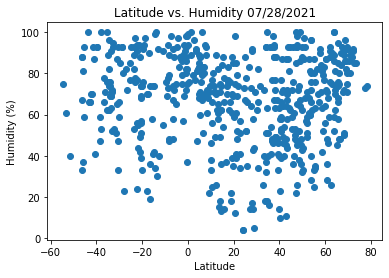

In [10]:
plt.scatter(clean_city_data['Lat'], clean_city_data['Humidity'], marker='o')

# Incorporate the other graph properties
plt.title(f'Latitude vs. Humidity {time.strftime("%m/%d/%Y")}')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')

# Save the figure
plt.savefig('../output_data/Latitude-vs-Humidity.png')

# Show plot
plt.show()

The Latitude vs Humidity plot shown above show us all the percentage of humidity that these cities have and it seems that around the 50% mark and above is where most of the data is living, much harder to tell if there is any relationship at all. 

## Latitude vs. Cloudiness Plot

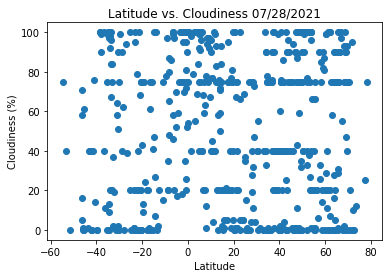

In [11]:
plt.scatter(clean_city_data['Lat'], clean_city_data['Cloudiness'], marker='o')

# Incorporate the other graph properties
plt.title(f'Latitude vs. Cloudiness {time.strftime("%m/%d/%Y")}')
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')

# Save the figure
plt.savefig('../output_data/Latitude-vs-Cloudiness.png')

# Show plot
plt.show()

The Latitude vs Cloudiness plot shown above show us all the percentage of cloudiness that these cities have and it seems that while there doesn't seem to be any strong correlations there does seem to be some noticable clumping around certain values like ~0, ~20, ~40, ~70, and ~100.

## Latitude vs. Wind Speed Plot

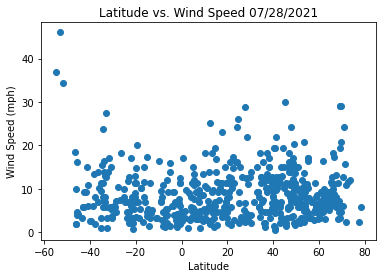

In [12]:
plt.scatter(clean_city_data['Lat'], clean_city_data['Wind Speed'], marker='o')

# Incorporate the other graph properties
plt.title(f'Latitude vs. Wind Speed {time.strftime("%m/%d/%Y")}')
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')

# Save the figure
plt.savefig('../output_data/Latitude-vs-Wind-Speed.png')

# Show plot
plt.show()

The Latitude vs Wind Speed plot shown above show us the speed of the wind in mph that these cities have and it seems that while there doesn't seem to be any strong correlations we can see that most cities experience winds under 30 mph while a few outliers live above that. 

## Linear Regression

In [13]:
# Making a northern hemisphere dataframe
northern_hemisphere_df = clean_city_data.loc[clean_city_data['Lat'] >= 0]

# Making a southern hemisphere dataframe
southern_hemisphere_df = clean_city_data.loc[clean_city_data['Lat'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

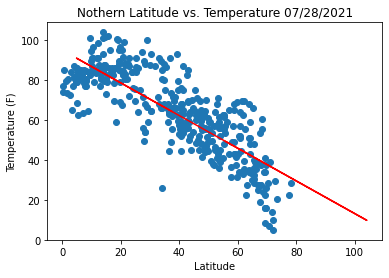

The equation of the best fit is the following: y= -0.82x +95.11


In [14]:
north_temp = northern_hemisphere_df['Max Temp']
north_lat = northern_hemisphere_df['Lat']

# linear regression formula and line_eq building
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_lat, north_temp)
fit = slope * north_temp + intercept

# plotting the graph 
plt.scatter(north_lat, north_temp)
plt.plot(north_temp,fit,'r-')

# Incorporate the other graph properties
plt.title(f'Nothern Latitude vs. Temperature {time.strftime("%m/%d/%Y")}')
plt.ylabel('Temperature (F)')
plt.xlabel('Latitude')

# Save the figure
plt.savefig('../output_data/Latitude-vs-Temperature-Linear-Regression-Northern.png')

# Show plot
plt.show()

# show line_eq
line_eq = 'y= ' + str(round(slope,2)) + 'x +' + str(round(intercept,2))
print(f'The equation of the best fit is the following: {line_eq}')


The chart above shows us the Temperature vs. Latitude plot for cities in the northern hemisphere. The temperature appears show a strong negative linear relationship with latitudes in the northern hemisphere

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

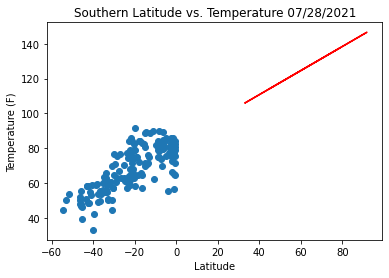

The equation of the best fit is the following: y= 0.69x +83.07


In [15]:
south_temp = southern_hemisphere_df['Max Temp']
south_lat = southern_hemisphere_df['Lat']

# linear regression formula and line_eq building
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_lat, south_temp)
fit = slope * south_temp + intercept

# plotting the graph 
plt.scatter(south_lat, south_temp)
plt.plot(south_temp,fit,'r-')

# Incorporate the other graph properties
plt.title(f'Southern Latitude vs. Temperature {time.strftime("%m/%d/%Y")}')
plt.ylabel('Temperature (F)')
plt.xlabel('Latitude')

# Save the figure
plt.savefig('../output_data/Latitude-vs-Temperature-Linear-Regression-Southern.png')

# Show plot
plt.show()

# show line_eq
line_eq = 'y= ' + str(round(slope,2)) + 'x +' + str(round(intercept,2))
print(f'The equation of the best fit is the following: {line_eq}')

The chart above shows us the Temperature vs. Latitude plot for cities in the southern hemisphere. The temperature appears show a strong positve linear relationship with latitudes in the southern hemisphere

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

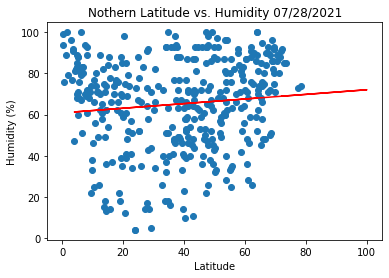

The equation of the best fit is the following: y= 0.11x +60.85


In [16]:
north_humidity = northern_hemisphere_df['Humidity']

# linear regression formula and line_eq building
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_lat, north_humidity)
fit = slope * north_humidity + intercept

# plotting the graph 
plt.scatter(north_lat, north_humidity)
plt.plot(north_humidity,fit,'r-')

# Incorporate the other graph properties
plt.title(f'Nothern Latitude vs. Humidity {time.strftime("%m/%d/%Y")}')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')

# Save the figure
plt.savefig('../output_data/Latitude-vs-Humidity-Linear-Regression-Northern.png')

# Show plot
plt.show()

# show line_eq
line_eq = 'y= ' + str(round(slope,2)) + 'x +' + str(round(intercept,2))
print(f'The equation of the best fit is the following: {line_eq}')

The chart above shows us the Latitude vs. Humidity plot for cities in the northern hemisphere. The chart appears show no relationship between humdidty and the latitude in the northern hemisphere

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

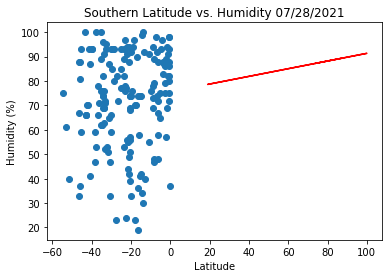

The equation of the best fit is the following: y= 0.16x +75.63


In [17]:
south_humidity = southern_hemisphere_df['Humidity']

# linear regression formula and line_eq building
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_lat, south_humidity)
fit = slope * south_humidity + intercept

# plotting the graph 
plt.scatter(south_lat, south_humidity)
plt.plot(south_humidity,fit,'r-')

# Incorporate the other graph properties
plt.title(f'Southern Latitude vs. Humidity {time.strftime("%m/%d/%Y")}')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')

# Save the figure
plt.savefig('../output_data/Latitude-vs-Humidity-Linear-Regression-Southern.png')

# Show plot
plt.show()

# show line_eq
line_eq = 'y= ' + str(round(slope,2)) + 'x +' + str(round(intercept,2))
print(f'The equation of the best fit is the following: {line_eq}')

The chart above shows us the Latitude vs. Humidity plot for cities in the southern hemisphere. The chart appears show a very slight postive relationship between humdidty and the latitude in the southern hemisphere

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

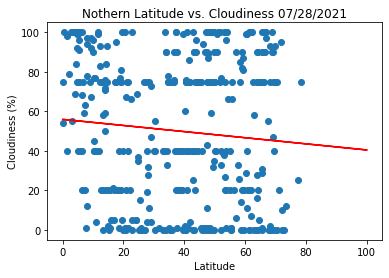

The equation of the best fit is the following: y= -0.15x +55.94


In [18]:
north_cloudiness = northern_hemisphere_df['Cloudiness']

# linear regression formula and line_eq building
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_lat, north_cloudiness)
fit = slope * north_cloudiness + intercept

# plotting the graph 
plt.scatter(north_lat, north_cloudiness)
plt.plot(north_cloudiness,fit,'r-')

# Incorporate the other graph properties
plt.title(f'Nothern Latitude vs. Cloudiness {time.strftime("%m/%d/%Y")}')
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')

# Save the figure
plt.savefig('../output_data/Latitude-vs-Cloudiness-Linear-Regression-Northern.png')

# Show plot
plt.show()

# show line_eq
line_eq = 'y= ' + str(round(slope,2)) + 'x +' + str(round(intercept,2))
print(f'The equation of the best fit is the following: {line_eq}')

The chart above shows us the Latitude vs. Cloudiness plot for cities in the northern hemisphere. The chart appears to show a slight negative relationship between cloudiness and the latitude in the northern hemisphere

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

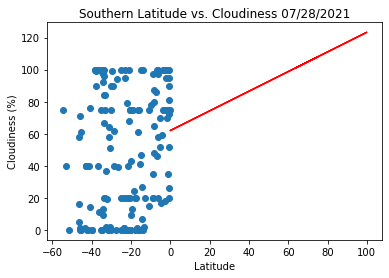

The equation of the best fit is the following: y= 0.61x +61.97


In [19]:
south_cloudiness = southern_hemisphere_df['Cloudiness']

# linear regression formula and line_eq building
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_lat, south_cloudiness)
fit = slope * south_cloudiness + intercept

# plotting the graph 
plt.scatter(south_lat, south_cloudiness)
plt.plot(south_cloudiness,fit,'r-')

# Incorporate the other graph properties
plt.title(f'Southern Latitude vs. Cloudiness {time.strftime("%m/%d/%Y")}')
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')

# Save the figure
plt.savefig('../output_data/Latitude-vs-Cloudiness-Linear-Regression-Southern.png')

# Show plot
plt.show()

# show line_eq
line_eq = 'y= ' + str(round(slope,2)) + 'x +' + str(round(intercept,2))
print(f'The equation of the best fit is the following: {line_eq}')

The chart above shows us the Latitude vs. Cloudiness plot for cities in the southern hemisphere. The temperature appears to show a strong postive relationship between cloudiness and the latitude in the southern hemisphere

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

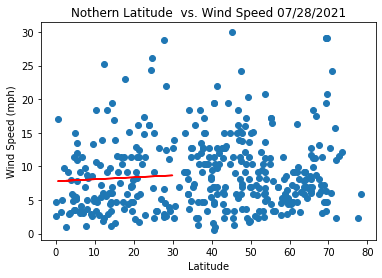

The equation of the best fit is the following: y= 0.03x +7.79


In [20]:
north_wind = northern_hemisphere_df['Wind Speed']

# linear regression formula and line_eq building
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_lat, north_wind)
fit = slope * north_wind + intercept

# plotting the graph 
plt.scatter(north_lat, north_wind)
plt.plot(north_wind,fit,'r-')

# Incorporate the other graph properties
plt.title(f'Nothern Latitude  vs. Wind Speed {time.strftime("%m/%d/%Y")}')
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')

# Save the figure
plt.savefig('../output_data/Latitude-vs-Wind-Speed-Linear-Regression-Northern.png')

# Show plot
plt.show()

# show line_eq
line_eq = 'y= ' + str(round(slope,2)) + 'x +' + str(round(intercept,2))
print(f'The equation of the best fit is the following: {line_eq}')

The chart above shows us the Latitude vs. Wind Speed plot for cities in the northern hemisphere. The temperature appears to show no relationship between wind speed and the latitude in the nothern hemisphere

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

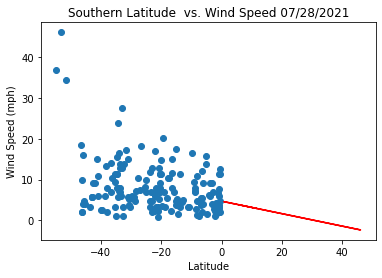

The equation of the best fit is the following: y= -0.15x +4.71


In [21]:
south_wind = southern_hemisphere_df['Wind Speed']

# linear regression formula and line_eq building
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_lat, south_wind)
fit = slope * south_wind + intercept

# plotting the graph 
plt.scatter(south_lat, south_wind)
plt.plot(south_wind,fit,'r-')

# Incorporate the other graph properties
plt.title(f'Southern Latitude  vs. Wind Speed {time.strftime("%m/%d/%Y")}')
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')

# Save the figure
plt.savefig('../output_data/Latitude-vs-Wind-Speed-Linear-Regression-Southern.png')

# Show plot
plt.show()

# show line_eq
line_eq = 'y= ' + str(round(slope,2)) + 'x +' + str(round(intercept,2))
print(f'The equation of the best fit is the following: {line_eq}')

The chart above shows us the Latitude vs. Wind Speed plot for cities in the southern hemisphere. The temperature appears to a slght negative relationship between wind speed and the latitude in the southern hemisphere